### [예상 대진표](https://school.programmers.co.kr/learn/courses/30/lessons/12985)

In [ ]:
def solution(n,a,b):
    answer = 1
    na = (a+1) // 2
    nb = (b+1) // 2
    if abs(a-b) == 1 and na == nb:
        return answer
    while True:
        a, b = na, nb
        na = (a+1) // 2
        nb = (b+1) // 2
        answer += 1
        if abs(a-b) == 1 and na == nb:
            return answer

In [2]:
sorted("Zbcdefg")

['Z', 'b', 'c', 'd', 'e', 'f', 'g']

### [문자열 내림차순으로 배치하기](https://school.programmers.co.kr/learn/courses/30/lessons/12917?language=python3)

- 프로그래머스 ai가 추천하는 내 부족한 점? 이라는데....흠....

In [3]:
solution = lambda s: "".join(sorted(s, reverse=True))

### [합성수 찾기](https://school.programmers.co.kr/learn/courses/30/lessons/120846)

- 이런 건 좀 아닌 거 같은데...일단 한 문제만 더...

In [4]:
def solution(n):
    if n < 4:
        return 0
    
    answer = 0
    for i in range(4, n+1):
        cnt = 0
        for j in range(2, i//2+1):
            share, extra = divmod(i, j)
            if extra == 0:
                answer += 1
                break
        
    return answer

(2, 0)

### [주사위의 개수](https://school.programmers.co.kr/learn/courses/30/lessons/120845)

In [ ]:
import math

solution = lambda box, n: math.prod([x//n for x in box])

### [크기가 작은 문자열](https://school.programmers.co.kr/learn/courses/30/lessons/147355)

In [ ]:
def solution(t, p):
    N = len(p)
    p = int(p)
    return len([x for x in range(len(t)-N+1) if int(t[x:x+N]) <= p])

### [제일 작은 수 제거하기](https://school.programmers.co.kr/learn/courses/30/lessons/12935)

In [5]:
def solution(arr):
    arr.remove(min(arr))
    return arr if len(arr) > 0 else [-1]

### [합승 택시 요금](https://school.programmers.co.kr/learn/courses/30/lessons/72413)

- 플로이드 워셜 알고리즘

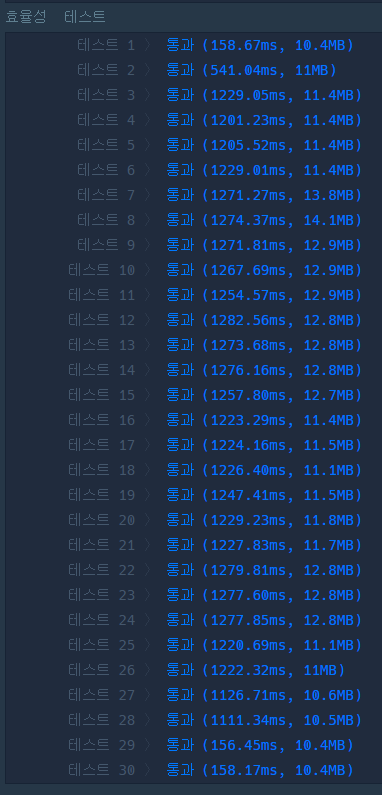

In [ ]:
def solution(n, s, a, b, fares):
    # 무한대를 나타내는 값 설정
    INF = int(1e9)
    
    # 1-based indexing을 위해 (n+1) x (n+1) 크기의 거리 테이블 초기화
    distance = [[INF] * (n + 1) for _ in range(n + 1)]
    
    # 자기 자신으로 가는 비용은 0
    for i in range(1, n + 1):
        distance[i][i] = 0
    
    # 주어진 요금 정보로 거리 테이블 업데이트
    for c, d, f in fares:
        distance[c][d] = f
        distance[d][c] = f  # 양방향 이동 가능
    
    # 플로이드-워셜 알고리즘 수행
    for k in range(1, n + 1):
        for i in range(1, n + 1):
            for j in range(1, n + 1):
                if distance[i][j] > distance[i][k] + distance[k][j]:
                    distance[i][j] = distance[i][k] + distance[k][j]
    
    # 최소 요금 계산
    min_fare = INF
    for k in range(1, n + 1):
        total_fare = distance[s][k] + distance[k][a] + distance[k][b]
        if total_fare < min_fare:
            min_fare = total_fare
    
    return min_fare


- 다익스트라 알고리즘

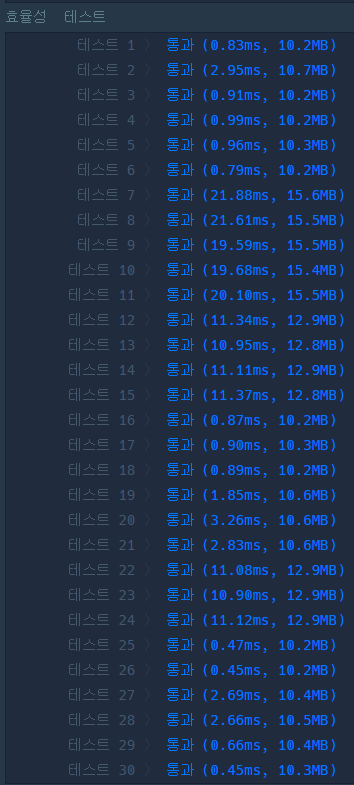

In [1]:
import heapq

def solution(n, s, a, b, fares):
    # 인접 리스트 생성
    graph = [[] for _ in range(n + 1)]
    for c, d, f in fares:
        graph[c].append((d, f))
        graph[d].append((c, f))
    
    def dijkstra(start):
        INF = int(1e9)
        distance = [INF] * (n + 1)
        distance[start] = 0
        heap = []
        heapq.heappush(heap, (0, start))
        
        while heap:
            current_dist, current_node = heapq.heappop(heap)
            
            if current_dist > distance[current_node]:
                continue
            
            for neighbor, weight in graph[current_node]:
                distance_through_current = current_dist + weight
                if distance[neighbor] > distance_through_current:
                    distance[neighbor] = distance_through_current
                    heapq.heappush(heap, (distance[neighbor], neighbor))
        
        return distance
    
    # 각 지점에서의 최단 거리 계산
    distance_from_s = dijkstra(s)
    distance_from_a = dijkstra(a)
    distance_from_b = dijkstra(b)
    
    # 최소 요금 초기화
    min_fare = int(1e9)
    
    # 모든 지점을 합승 지점으로 고려
    for k in range(1, n + 1):
        total_fare = distance_from_s[k] + distance_from_a[k] + distance_from_b[k]
        if total_fare < min_fare:
            min_fare = total_fare
    
    return min_fare
